<a href="https://colab.research.google.com/github/afrels/BME450-project/blob/main/AndrewTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [16]:
#Here we do all of our importing. I am not entirely sure if the 4th and 5th lines are required

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [4]:
#allows access to Google Drive files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loader
Here the data is loaded in. It is uploaded to Andrew's Drive. To run without modifying the code, place the file in the main directory of your Google Drive and run this script using Jupyter on Google Colab. You may have to mount your drive. Use the second box in the setup section.


In [44]:
#Load the data file
df = pd.read_csv('/content/drive/MyDrive/IMDB-Dataset.csv')

#Turn positive and negative into binary
sentiment_map = {'positive': 1, 'negative': 0}
df['sentiment_binary'] = df['sentiment'].map(sentiment_map)

#Sets the review and sentiment columns
reviews = df.iloc[:, 0].values
sentiments = df.iloc[:, 2].values

#Splits the data into the training set (70%) and the testing set (30%). I picked
# the random state (the shuffle random seed) because it's my lucky number
X_train, X_t, Y_train, Y_t = train_test_split(reviews, sentiments, test_size=0.2, random_state=26)

#Further splits the testing set by half into a validation set used during training and a final test set 
X_test, X_val, Y_test, Y_val = train_test_split(X_t, Y_t, test_size=0.5, random_state=16)

50000
['I don\'t understand why everyone hates this movie, aside from the fact that they\'re just jealous their music careers never took off like mega Popstar Aaron Carter. Like it or not Aaron has seen more success in his young life than most people could ever dream of having, so it only seemed natural for him to do a movie. Lou Pearlman and company have been known for over-exploiting their pop protégées, you remember Justin Timberlake\'s foray into TV movie Model Behavior? Granted this movie isn\'t big scale and impressive, but it\'s not supposed to be. It\'s not trying to impress people or be an Emmy award winner, it was released straight to DVD. It\'s just a cute little movie about an awkward teen who gets her dream of being with her favorite Popstar; I know a lot of you out there have had that dream at some point or another about you favorite singer, don\'t deny it. It\'s sweet and gentle and I applaud it for not stepping into the realm of sex, violence, and vulgar language that s

# Tokenization
This step is important for text based networks as it transforms the data from what we can understand, words, to what the computer can better deal with, integers. There is also the issue of inputs to the network being uniform so all data is padded or trimmed to be the same length.

In [45]:
#Use built in Keras tokenizer. oov token deals with unknown characters. Number of words could be increased if there is bad loss
tokenizer = Tokenizer(num_words=20000, oov_token='OOV')

#establishes the library of words to use as all the words in our data
tokenizer.fit_on_texts(X_train)

#Turn our train and test data into numerical data and pad all entries to the same length for input consistency
#The post modifier makes all cuts or additions at the end. The padding character is, by default, 0
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=500, padding='post', truncating='post')

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=500, padding='post', truncating='post')

X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val, maxlen=500, padding='post', truncating='post')


# Neural Network

In [27]:
#Normal Sequential Network -> had very high loss
#model = tf.keras.Sequential() 
#model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=16, input_length=500))    
#model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dense(16, activation='relu'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#Dropout Network to reduce overfitting -> Still high loss, made smaller
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=16, input_length=500))
#model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dense(8, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [65]:
#Smaller Dropout Network to reduce overfitting
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=16, input_length=500))

model.add(tf.keras.layers.GlobalAveragePooling1D())

model.add(tf.keras.layers.Dense(8, activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Initialization

In [66]:
  #Loss Function Choice - This parameter allows us to pick the way loss will be 
#calculated using a number of built in algorithms. Since we talked about it in 
#class, we chose to use Mean Squared Error since it is the easiest to understand
# and apparently pretty good.
  #Optimizer Choice - This allows us to pick an optimization algorithm. We don't
#fully understand it, but it essentially the algorythm by which the model rewires itself. Adam, via research
#appears to be a common choice for its speed and good results
  #Metric Choice - The chosen metric was accuracy, simple correctness, as it was very simple to understand

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=15, validation_data=(X_val, Y_val), shuffle=True)

Epoch 1/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6863 - accuracy: 0.5634 - val_loss: 0.6610 - val_accuracy: 0.7144
Epoch 2/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6017 - accuracy: 0.7050 - val_loss: 0.4920 - val_accuracy: 0.8192
Epoch 3/15
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4739 - accuracy: 0.7865 - val_loss: 0.3756 - val_accuracy: 0.8526
Epoch 4/15
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4115 - accuracy: 0.8195 - val_loss: 0.3286 - val_accuracy: 0.8728
Epoch 5/15
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3773 - accuracy: 0.8340 - val_loss: 0.3003 - val_accuracy: 0.8796
Epoch 6/15
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3543 - accuracy: 0.8476 - val_loss: 0.2854 - val_accuracy: 0.8846
Epoch 7/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3379 - accuracy: 0.8551 - val_loss: 0.2765 - val_accuracy:

# Final Test Set

In [67]:
model.evaluate(X_test, Y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8904


[0.2697524130344391, 0.8903999924659729]

In [68]:
model.predict(X_test)

157/157 [==============================] - 0s 2ms/step


array([[0.05255065],
       [0.44716254],
       [0.9887505 ],
       ...,
       [0.80898744],
       [0.9759519 ],
       [0.34136388]], dtype=float32)

# Graphs

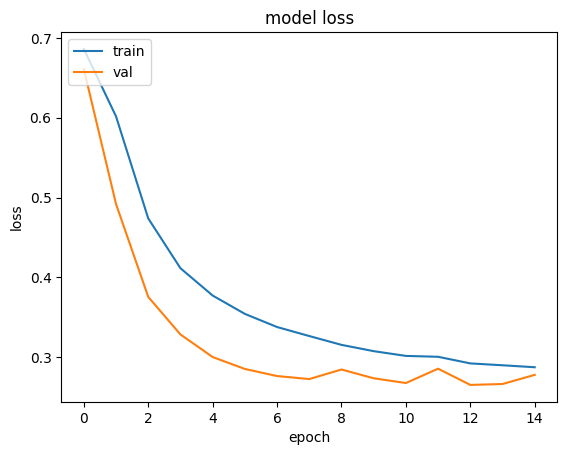

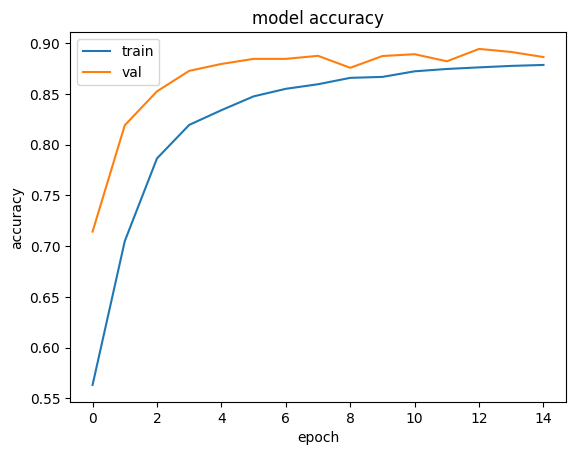

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Good-Bad Testing


In [70]:
#Load the data file
df_G = pd.read_csv('/content/drive/MyDrive/GoodTest.csv')
df_B = pd.read_csv('/content/drive/MyDrive/BadTest.csv')

#Turn positive and negative into binary
sentiment_map = {'positive': 1, 'negative': 0}
df_G['sentiment_binary'] = df['sentiment'].map(sentiment_map)
df_B['sentiment_binary'] = df['sentiment'].map(sentiment_map)

#Sets the review and sentiment columns
reviews_G = df_G.iloc[:, 0].values
sentiments_G = df_G.iloc[:, 2].values

reviews_B = df_B.iloc[:, 0].values
sentiments_B = df_B.iloc[:, 2].values

X_train_G, X_t_G, Y_train_G, Y_t_G = train_test_split(reviews_G, sentiments_G, test_size=0.01, random_state=26)
X_train_B, X_t_B, Y_train_B, Y_t_B = train_test_split(reviews_B, sentiments_B, test_size=0.01, random_state=26)

In [71]:
#Turn our train and test data into numerical data and pad all entries to the same length for input consistency
#The post modifier makes all cuts or additions at the end. The padding character is, by default, 0
X_Good = tokenizer.texts_to_sequences(X_train_G)
X_Bad = tokenizer.texts_to_sequences(X_train_B)

X_Good = pad_sequences(X_Good, maxlen=500, padding='post', truncating='post')
X_Bad = pad_sequences(X_Bad, maxlen=500, padding='post', truncating='post')


In [72]:
model.evaluate(X_Good, Y_train_G)

2/2 [==============================] - 0s 7ms/step - loss: 0.7110 - accuracy: 0.5417


[0.7110293507575989, 0.5416666865348816]

In [73]:
model.evaluate(X_Bad, Y_train_B)

1/1 [==============================] - 0s 35ms/step - loss: 0.9031 - accuracy: 0.5172


[0.903145432472229, 0.517241358757019]